In [1]:
import sys
sys.path.append("/data6/deepro/ukb_bmi/3_characterization/src")

In [2]:
import pandas as pd
import utils.parsing as utpa

In [3]:
common_combos_file = "/data6/deepro/ukb_bmi/3_characterization/data/lifestyle_factors/common_combos.csv"

In [4]:
common_combos_df = pd.read_csv(common_combos_file)

In [6]:
cohort_file = "/data6/deepro/ukb_bmi/0_data_preparation_and_download/phenotype/data/bmi_processed/british/train_cohort_bmi.csv.gz"

In [24]:
cohort_df = pd.read_csv(cohort_file, usecols=["sample_names", "bmi", "bmi_prs"], dtype={"sample_names": str})

In [18]:
gene_combo_samples = set("|".join(common_combos_df.combo_samples_obesity.values).split("|"))
lf_combo_samples = set("|".join(common_combos_df.combo_samples_lifestyle.values).split("|"))

In [20]:
gene_only_combo_samples = gene_combo_samples.difference(lf_combo_samples)

In [32]:
cohort_filtered_df = cohort_df.loc[cohort_df.sample_names.isin(gene_combo_samples)]

In [33]:
cohort_filtered_df["gene_only"] = cohort_filtered_df.sample_names.isin(gene_only_combo_samples)

/tmp/ipykernel_85518/1838663417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_filtered_df["gene_only"] = cohort_filtered_df.sample_names.isin(gene_only_combo_samples)


In [39]:
import seaborn as sns
import numpy as np

<AxesSubplot: xlabel='gene_only', ylabel='bmi'>

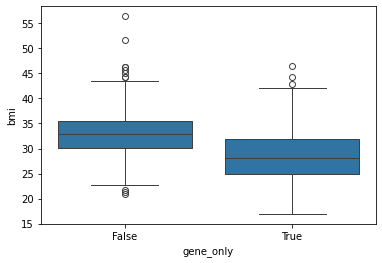

In [38]:
sns.boxplot(data=cohort_filtered_df, x="gene_only", y="bmi")

In [40]:
cohort_filtered_df.groupby("gene_only").agg({"bmi": np.mean, "bmi_prs": np.mean})

/tmp/ipykernel_85518/2276942110.py:1: FutureWarning: The provided callable <function mean at 0x7f8d0816fba0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  cohort_filtered_df.groupby("gene_only").agg({"bmi": np.mean, "bmi_prs": np.mean})


,bmi,bmi_prs
gene_only,,
False,33.401551,-0.209139
True,28.689034,-0.232272


In [41]:
cohort_df.describe()

,bmi_prs,bmi
count,427639.000000,427639.000000
mean,-0.210072,27.408959
std,0.977277,4.759051
min,-4.709030,12.121200
25%,-0.869764,24.144500
50%,-0.209924,26.729300
75%,0.448501,29.861600
max,4.164230,74.683700


In [42]:
other_cohort_file = "/data6/deepro/ukb_bmi/0_data_preparation_and_download/phenotype/data/bmi_processed/british/test_cohort_bmi.csv.gz"

In [43]:
other_cohort_df = pd.read_csv(other_cohort_file, usecols=["sample_names", "bmi", "bmi_prs"], dtype={"sample_names": str})

In [44]:
other_cohort_df.describe()

,bmi_prs,bmi
count,56630.000000,56630.000000
mean,-0.081392,27.496012
std,0.994735,4.969417
min,-4.603130,14.133400
25%,-0.754895,24.088800
50%,-0.082651,26.794350
75%,0.587861,30.063000
max,4.331770,68.129900


In [45]:
phenotype_file = "/data6/deepro/ukb_bmi/0_data_preparation_and_download/phenotype/data/bmi_processed/filtered_bmi_info.csv.gz"

In [46]:
phenotype_df = pd.read_csv(phenotype_file,  usecols=["sample_names", "bmi", "bmi_prs"], dtype={"sample_names": str})

In [47]:
phenotype_df.describe()

,bmi_prs,bmi
count,484269.000000,499198.000000
mean,-0.195024,27.433361
std,0.980206,4.800962
min,-4.709030,12.121200
25%,-0.856674,24.142862
50%,-0.195968,26.744500
75%,0.465615,29.904100
max,4.331770,74.683700
